# Task 2: EXPLORATORY DATA ANALYSIS
---

# Importing Essential Libraries

In [ ]:
# Import data analysis and visualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')
import warnings
warnings.filterwarnings('ignore')

**Optional:** Data can be loaded from the Google Drive

In [ ]:
# import gdown

# url = "https://drive.google.com/file/d/1w1OQUxBmvrnlK3tNFVpXHHTv5Sy1JJCj/view?usp=sharing"
# file_id = url.split("/")[-2]
# prefix = "https://drive.google.com/uc?export=download&id="

# gdown.download(prefix + file_id)
# print("Data downloaded!")

In [ ]:
# !unzip arfrica_crop_yield_fusion.zip
# !rm -rf arfrica_crop_yield_fusion.zip

# Data Loading and Checking

In [ ]:
# Load the dataframes
crop_df = pd.read_csv('merged_data_yield.csv')

In [ ]:
# Check the data frame
crop_df.head()

,country,year,cropland_area,ndvi_mean,temperature_mean,average_annual_precipitation_mm,clay_mean_value,sand_mean_value,nitrogen_mean_value,phh2o_mean_value,...,rice_yield_tonnes_per_hectare,bananas_yield_tonnes_per_hectare,maize_yield_tonnes_per_hectare,soybean_yield_tonnes_per_hectare,potatoes_yield_tonnes_per_hectare,beans_yield_tonnes_per_hectare,peas_yield_tonnes_per_hectare,cassava_yield_tonnes_per_hectare,cocoa_beans_yield_tonnes_per_hectare,barley_yield_tonnes_per_hectare
0,Dem. Rep. Congo,2017,6802.801352,0.585498,297.787228,1595.731927,335.819403,430.235202,2774.424658,5.408747,...,0.8416,3.7635,0.7719,0.4922,4.5702,0.5430,0.4046,8.1420,0.4861,0.6805
1,Dem. Rep. Congo,2018,8236.848528,0.588366,297.595389,1622.158468,317.736961,462.290274,2668.407075,5.401797,...,0.9009,3.7585,0.7702,0.5428,4.5620,0.5429,0.4048,8.1447,0.4516,0.6826
2,Dem. Rep. Congo,2019,6202.692128,0.589856,297.840254,1787.483950,334.971571,431.951936,2814.075162,5.416112,...,0.9692,3.7568,0.7704,0.5218,4.5737,0.5437,0.4058,8.1497,0.4797,0.6806
3,Dem. Rep. Congo,2020,5960.192934,0.603436,297.932522,1825.378869,332.487986,435.046831,2825.262649,5.438038,...,1.1184,3.7552,0.7706,0.5136,4.5909,0.5447,0.4047,8.1453,0.5077,0.6812
4,Dem. Rep. Congo,2021,6982.951826,0.594865,297.975652,1462.586482,320.117299,456.527239,2645.724268,5.435061,...,1.1130,3.7563,0.7697,0.5375,4.5889,0.5449,0.4050,8.1481,0.5207,0.6815


In [ ]:
# Checking the dimension of the data frame
crop_df.shape

(294, 22)

In [ ]:
# Checking the column names
crop_df.columns

Index(['country', 'year', 'cropland_area', 'ndvi_mean', 'temperature_mean',
       'average_annual_precipitation_mm', 'clay_mean_value', 'sand_mean_value',
       'nitrogen_mean_value', 'phh2o_mean_value', 'soc_mean_value',
       'wheat_yield_tonnes_per_hectare', 'rice_yield_tonnes_per_hectare',
       'bananas_yield_tonnes_per_hectare', 'maize_yield_tonnes_per_hectare',
       'soybean_yield_tonnes_per_hectare', 'potatoes_yield_tonnes_per_hectare',
       'beans_yield_tonnes_per_hectare', 'peas_yield_tonnes_per_hectare',
       'cassava_yield_tonnes_per_hectare',
       'cocoa_beans_yield_tonnes_per_hectare',
       'barley_yield_tonnes_per_hectare'],
      dtype='object')

In [ ]:
# Check all the unique value in the country name
crop_df['country'].unique()

array(['Dem. Rep. Congo', 'Chad', 'Central African Rep.', 'Tanzania',
       'Somalia', 'Kenya', 'Zimbabwe', 'Malawi', 'Mozambique', 'Burundi',
       'Madagascar', 'Eritrea', 'Ethiopia', 'Uganda', 'Rwanda',
       'S. Sudan', 'Mali', 'Mauritania', 'Benin', 'Niger', 'Togo',
       'Guinea', 'Guinea-Bissau', 'Liberia', 'Sierra Leone',
       'Burkina Faso', 'Gambia', 'Gabon', 'Angola', 'Tunisia', 'Algeria',
       'Libya', 'South Africa', 'Botswana', 'Namibia', 'Cameroon',
       'Congo', 'Zambia', 'Djibouti', 'Senegal', 'Nigeria', 'Ghana',
       "Côte d'Ivoire", 'Sudan', 'Morocco', 'Egypt', 'Lesotho',
       'eSwatini', 'Eq. Guinea'], dtype=object)

In [ ]:
# Standardize country names for geo mapping later
country_name_mapping = {
    'Dem. Rep. Congo': 'Democratic Republic of the Congo',
    'Central African Rep.': 'Central African Republic',
    'S. Sudan': 'South Sudan',
    'eSwatini': 'Eswatini',
    'Eq. Guinea': 'Equatorial Guinea'
}

crop_df['country'] = crop_df['country'].replace(country_name_mapping)

In [ ]:
# Checking the information of the data frame
crop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 22 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               294 non-null    object 
 1   year                                  294 non-null    int64  
 2   cropland_area                         294 non-null    float64
 3   ndvi_mean                             294 non-null    float64
 4   temperature_mean                      294 non-null    float64
 5   average_annual_precipitation_mm       294 non-null    float64
 6   clay_mean_value                       294 non-null    float64
 7   sand_mean_value                       294 non-null    float64
 8   nitrogen_mean_value                   294 non-null    float64
 9   phh2o_mean_value                      294 non-null    float64
 10  soc_mean_value                        294 non-null    float64
 11  wheat_yield_tonnes_

In [ ]:
# Basic statistic of the dataset
crop_df.describe()

,year,cropland_area,ndvi_mean,temperature_mean,average_annual_precipitation_mm,clay_mean_value,sand_mean_value,nitrogen_mean_value,phh2o_mean_value,soc_mean_value,...,rice_yield_tonnes_per_hectare,bananas_yield_tonnes_per_hectare,maize_yield_tonnes_per_hectare,soybean_yield_tonnes_per_hectare,potatoes_yield_tonnes_per_hectare,beans_yield_tonnes_per_hectare,peas_yield_tonnes_per_hectare,cassava_yield_tonnes_per_hectare,cocoa_beans_yield_tonnes_per_hectare,barley_yield_tonnes_per_hectare
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,...,246.000000,207.000000,276.000000,156.000000,222.000000,216.000000,120.000000,204.000000,102.000000,90.000000
mean,2019.500000,20966.346764,0.424129,297.533448,848.552280,270.900393,491.196649,1904.710908,6.385631,236.149604,...,2.657925,16.703145,1.853132,1.274337,13.233035,1.375782,1.105399,11.019497,0.419778,2.460357
std,1.710737,36211.218261,0.108166,3.498619,598.033120,66.273666,111.578019,862.691454,0.805599,121.808996,...,1.849230,13.326955,1.515566,0.841425,9.561858,1.751187,1.071753,6.766334,0.280949,1.935435
min,2017.000000,4.964052,0.140037,284.159326,16.597103,127.652968,273.711287,638.500849,4.757143,60.596709,...,0.374500,3.755200,0.202900,0.416300,0.616000,0.061400,0.009600,1.450000,0.050600,0.355100
25%,2018.000000,1923.028966,0.350937,295.463491,409.972954,220.133117,412.730669,1272.708370,5.976737,140.488809,...,1.399150,6.902000,1.000000,0.742300,6.176250,0.541100,0.472450,6.358400,0.163825,0.846225
50%,2019.500000,6133.904285,0.449889,297.983285,749.820417,267.355914,492.168924,1803.970243,6.185484,208.964378,...,2.200400,11.729000,1.510550,1.049850,10.352400,0.829800,0.836700,9.198450,0.447750,1.889000
75%,2021.000000,21188.389766,0.495638,300.432489,1106.600294,320.317639,566.189254,2488.568925,6.670332,319.287931,...,3.305300,24.658750,2.102625,1.553325,18.320324,1.342325,1.189200,14.319749,0.523175,3.537950
max,2022.000000,193585.742837,0.658222,302.648743,3177.259353,402.285714,739.969989,4387.714286,8.013354,601.900000,...,11.351100,62.088600,13.551700,6.797000,37.803100,10.043400,5.668100,35.538000,1.127400,8.108000


In [ ]:
# Checking for missing values
crop_df.isnull().sum()

country                                   0
year                                      0
cropland_area                             0
ndvi_mean                                 0
temperature_mean                          0
average_annual_precipitation_mm           0
clay_mean_value                           0
sand_mean_value                           0
nitrogen_mean_value                       0
phh2o_mean_value                          0
soc_mean_value                            0
wheat_yield_tonnes_per_hectare          103
rice_yield_tonnes_per_hectare            48
bananas_yield_tonnes_per_hectare         87
maize_yield_tonnes_per_hectare           18
soybean_yield_tonnes_per_hectare        138
potatoes_yield_tonnes_per_hectare        72
beans_yield_tonnes_per_hectare           78
peas_yield_tonnes_per_hectare           174
cassava_yield_tonnes_per_hectare         90
cocoa_beans_yield_tonnes_per_hectare    192
barley_yield_tonnes_per_hectare         204
dtype: int64

<font color='orange'>Notes: </font> Missing values here likely indicate that certain locations lack data for that specific crop, suggesting no plantation.

# Exploratory Data Analysis (EDA)

1. **Data Overview**
- The dataset contains agricultural data across various countries and years.
- It includes variables related to cropland area, NDVI (Normalized Difference Vegetation Index), mean temperature, precipitation, soil composition, and yields of various crops.

2. **Column Information**
- `country`: Name of the country
- `year`: Year of data collection
- `cropland_area`: Area of cropland
- `ndvi_mean`: Mean NDVI value
- `temperature_mean`: Mean temperature in Kelvin
- `average_annual_precipitation_mm`: Annual precipitation in millimeters
- Soil composition metrics: `clay_mean_value`, `sand_mean_value`, `nitrogen_mean_value`, `phh2o_mean_value`, `soc_mean_value`
- Crop yield columns: `rice_yield_tonnes_per_hectare`, `bananas_yield_tonnes_per_hectare`, `maize_yield_tonnes_per_hectare`, `soybean_yield_tonnes_per_hectare`, `potatoes_yield_tonnes_per_hectare`, `beans_yield_tonnes_per_hectare`, `peas_yield_tonnes_per_hectare`, `cassava_yield_tonnes_per_hectare`, `cocoa_beans_yield_tonnes_per_hectare`, `barley_yield_tonnes_per_hectare`



In [ ]:
# List of yield columns
yield_columns = [
    'wheat_yield_tonnes_per_hectare', 'rice_yield_tonnes_per_hectare',
    'bananas_yield_tonnes_per_hectare', 'maize_yield_tonnes_per_hectare',
    'soybean_yield_tonnes_per_hectare', 'potatoes_yield_tonnes_per_hectare',
    'beans_yield_tonnes_per_hectare', 'peas_yield_tonnes_per_hectare',
    'cassava_yield_tonnes_per_hectare', 'cocoa_beans_yield_tonnes_per_hectare',
    'barley_yield_tonnes_per_hectare'
]

# Compute the total yield by summing up the yield columns
crop_df['total_yield_tonnes_per_hectare'] = crop_df[yield_columns].sum(axis=1)

# Display the first few rows to verify the new column
crop_df.head()

,country,year,cropland_area,ndvi_mean,temperature_mean,average_annual_precipitation_mm,clay_mean_value,sand_mean_value,nitrogen_mean_value,phh2o_mean_value,...,bananas_yield_tonnes_per_hectare,maize_yield_tonnes_per_hectare,soybean_yield_tonnes_per_hectare,potatoes_yield_tonnes_per_hectare,beans_yield_tonnes_per_hectare,peas_yield_tonnes_per_hectare,cassava_yield_tonnes_per_hectare,cocoa_beans_yield_tonnes_per_hectare,barley_yield_tonnes_per_hectare,total_yield_tonnes_per_hectare
0,Democratic Republic of the Congo,2017,6802.801352,0.585498,297.787228,1595.731927,335.819403,430.235202,2774.424658,5.408747,...,3.7635,0.7719,0.4922,4.5702,0.5430,0.4046,8.1420,0.4861,0.6805,21.9544
1,Democratic Republic of the Congo,2018,8236.848528,0.588366,297.595389,1622.158468,317.736961,462.290274,2668.407075,5.401797,...,3.7585,0.7702,0.5428,4.5620,0.5429,0.4048,8.1447,0.4516,0.6826,21.9868
2,Democratic Republic of the Congo,2019,6202.692128,0.589856,297.840254,1787.483950,334.971571,431.951936,2814.075162,5.416112,...,3.7568,0.7704,0.5218,4.5737,0.5437,0.4058,8.1497,0.4797,0.6806,22.0466
3,Democratic Republic of the Congo,2020,5960.192934,0.603436,297.932522,1825.378869,332.487986,435.046831,2825.262649,5.438038,...,3.7552,0.7706,0.5136,4.5909,0.5447,0.4047,8.1453,0.5077,0.6812,22.1573
4,Democratic Republic of the Congo,2021,6982.951826,0.594865,297.975652,1462.586482,320.117299,456.527239,2645.724268,5.435061,...,3.7563,0.7697,0.5375,4.5889,0.5449,0.4050,8.1481,0.5207,0.6815,22.1906


## <font color='blue'>DV: Heatmap of Correlation Matrix</font>

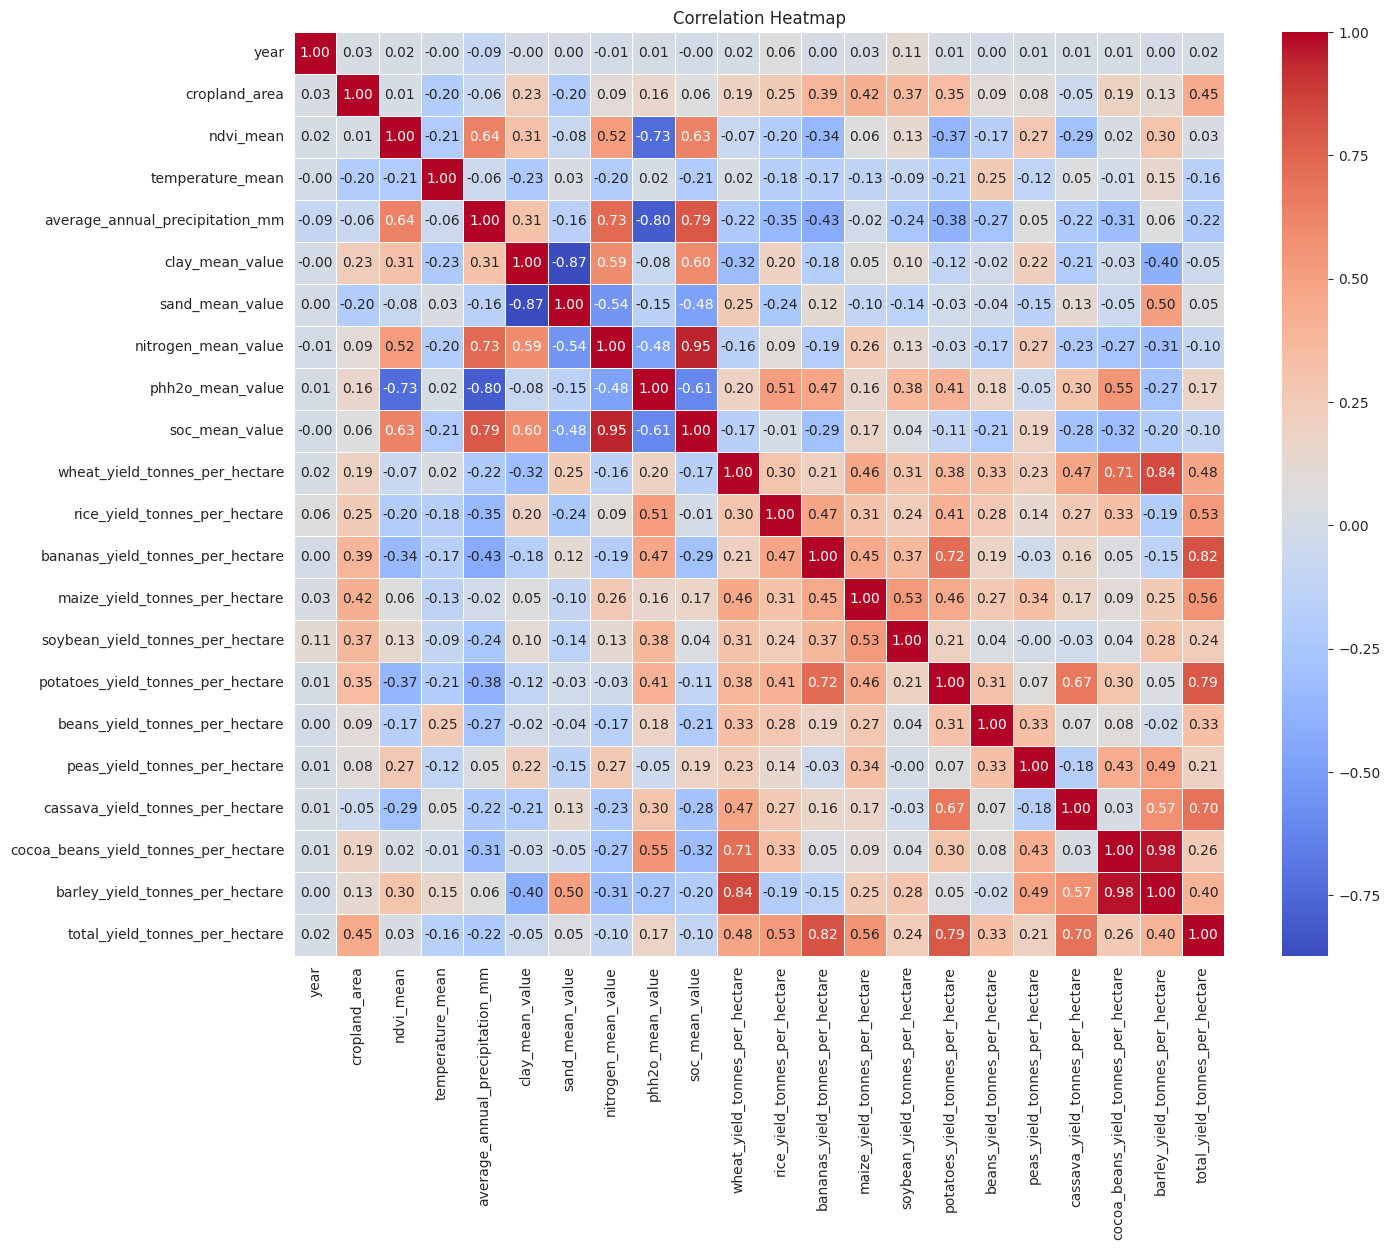

In [ ]:
# Compute the correlation matrix and create a heatmap
correlation_matrix = crop_df.corr(numeric_only=True)
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Observation from the Correlation Heatmap**
1. `Strong Positive Correlations`: There are strong positive correlations between different crop yields, indicating that factors influencing one crop's yield likely affect others similarly. For example, rice yield shows a high correlation with maize, beans, and peas yields.

2. `Environmental Factors`: Temperature and precipitation have varying degrees of correlation with crop yields. Temperature shows a moderate positive correlation with some yields (e.g., cocoa beans), while precipitation has a weaker but still notable positive correlation with several crop yields.

3. `Soil Properties`: Soil characteristics such as clay, sand, and nitrogen content show moderate correlations with crop yields. Nitrogen content is positively correlated with many crop yields, suggesting its importance in crop productivity.

4. `Total Yield`: The `total_yield_tonnes_per_hectare` is highly correlated with individual crop yields, as expected. This confirms that the new total yield metric is a comprehensive indicator of overall crop productivity.

## <font color='blue'>DV: Line Plot of Total Yield Over Time</font>

In [ ]:
# Create a line plot of total yield over time
fig = px.line(crop_df, x='year', y='total_yield_tonnes_per_hectare', color='country',
              title='Total Yield Tonnes per Hectare Over Time by Country',
              labels={'year': 'Year', 'total_yield_tonnes_per_hectare': 'Total Yield (tonnes/ha)'})

# Show the plot
fig.show()

In [ ]:
# Create a geo-map for total yield with a time slider
fig = px.choropleth(
    crop_df,
    locations='country',
    locationmode='country names',
    color='total_yield_tonnes_per_hectare',
    hover_name='country',
    animation_frame='year',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Total Yield Tonnes per Hectare by Country Over Time'
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")
fig.update_layout(coloraxis_colorbar=dict(title="Total Yield (tonnes/ha)"))
fig.show()

## <font color='blue'>DV: Line Plots for Each Crop Yield Over Time</font>

In [ ]:
# List of crop yield columns
crop_yield_columns = [ 'wheat_yield_tonnes_per_hectare',
    'rice_yield_tonnes_per_hectare', 'bananas_yield_tonnes_per_hectare',
    'maize_yield_tonnes_per_hectare', 'soybean_yield_tonnes_per_hectare',
    'potatoes_yield_tonnes_per_hectare', 'beans_yield_tonnes_per_hectare',
    'peas_yield_tonnes_per_hectare', 'cassava_yield_tonnes_per_hectare',
    'cocoa_beans_yield_tonnes_per_hectare', 'barley_yield_tonnes_per_hectare'
]

# Plot trends for each crop using Plotly
for crop in crop_yield_columns:
    fig = px.line(crop_df, x='year', y=crop, color='country', markers=True,
                  title=f'Trend of {crop.replace("_", " ").title()} Over Time',
                  labels={'year': 'Year', crop: crop.replace("_", " ").title()})
    fig.update_traces(marker=dict(size=5))  # Customize marker size if needed
    fig.show()